In [206]:
import folium
from folium import plugins
import ipywidgets
import geocoder

import numpy as np 
import pandas as pd

from vega_datasets import data as vds
from branca.element import Figure

import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit
import seaborn as sns

import scipy
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

import statsmodels
from statsmodels.tsa.statespace.sarimax import SARIMAX

# CO2 Emissions per Country from 1990-2019

In [3]:
Co2 = pd.read_csv('CO2_emission.csv')
Co2

,Country Name,country_code,Region,Indicator Name,1990,1991,1992,1993,1994,1995,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2019.1
0,Aruba,ABW,Latin America & Caribbean,CO2 emissions (metric tons per capita),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,South Asia,CO2 emissions (metric tons per capita),0.191745,0.167682,0.095958,0.084721,0.075546,0.068468,...,0.296506,0.259295,0.185624,0.146236,0.172897,0.149789,0.131695,0.163295,0.159824,0.159824
2,Angola,AGO,Sub-Saharan Africa,CO2 emissions (metric tons per capita),0.553662,0.544539,0.543557,0.708984,0.836804,0.912141,...,0.985522,0.950696,1.036294,1.099779,1.135044,1.031811,0.813301,0.777675,0.792137,0.792137
3,Albania,ALB,Europe & Central Asia,CO2 emissions (metric tons per capita),1.819542,1.242810,0.683700,0.638307,0.645355,0.605436,...,1.669423,1.503240,1.533630,1.668337,1.603775,1.557664,1.788786,1.782739,1.692248,1.692248
4,Andorra,AND,Europe & Central Asia,CO2 emissions (metric tons per capita),7.521832,7.235379,6.963079,6.724178,6.541579,6.733479,...,5.850886,5.944654,5.942800,5.807128,6.026182,6.080600,6.104134,6.362975,6.481217,6.481217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,Samoa,WSM,East Asia & Pacific,CO2 emissions (metric tons per capita),0.552836,0.609756,0.604266,0.658221,0.592807,0.705675,...,1.066843,1.057703,1.048702,1.092498,1.240246,1.542099,1.586830,1.478626,1.522124,1.522124
211,"Yemen, Rep.",YEM,Middle East & North Africa,CO2 emissions (metric tons per capita),0.567037,0.690937,0.704793,0.627105,0.653256,0.706081,...,0.963978,0.858491,1.106688,1.062211,0.511362,0.399364,0.359622,0.341068,0.380633,0.380633
212,South Africa,ZAF,Sub-Saharan Africa,CO2 emissions (metric tons per capita),6.729799,6.424622,6.175430,6.219194,6.215847,6.378790,...,7.869816,8.077958,8.138264,8.212241,7.669938,7.563739,7.641675,7.515679,7.507736,7.507736
213,Zambia,ZMB,Sub-Saharan Africa,CO2 emissions (metric tons per capita),0.340930,0.349232,0.337224,0.289956,0.241270,0.234153,...,0.217497,0.278601,0.284058,0.304550,0.312355,0.325115,0.404068,0.445489,0.380717,0.380717


In [4]:
carbon_df= Co2.fillna(0)

In [5]:
#add a column for total emissions
carbon_df['Total Emissions'] = Co2.sum(axis=1)
carbon_df.head()

/var/folders/ds/5nt6qnxj0tj3npycypwl5nch0000gn/T/ipykernel_1234/4184215063.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  carbon_df['Total Emissions'] = Co2.sum(axis=1)


,Country Name,country_code,Region,Indicator Name,1990,1991,1992,1993,1994,1995,...,2012,2013,2014,2015,2016,2017,2018,2019,2019.1,Total Emissions
0,Aruba,ABW,Latin America & Caribbean,CO2 emissions (metric tons per capita),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Afghanistan,AFG,South Asia,CO2 emissions (metric tons per capita),0.191745,0.167682,0.095958,0.084721,0.075546,0.068468,...,0.259295,0.185624,0.146236,0.172897,0.149789,0.131695,0.163295,0.159824,0.159824,3.666681
2,Angola,AGO,Sub-Saharan Africa,CO2 emissions (metric tons per capita),0.553662,0.544539,0.543557,0.708984,0.836804,0.912141,...,0.950696,1.036294,1.099779,1.135044,1.031811,0.813301,0.777675,0.792137,0.792137,27.806570
3,Albania,ALB,Europe & Central Asia,CO2 emissions (metric tons per capita),1.819542,1.242810,0.683700,0.638307,0.645355,0.605436,...,1.503240,1.533630,1.668337,1.603775,1.557664,1.788786,1.782739,1.692248,1.692248,39.216741
4,Andorra,AND,Europe & Central Asia,CO2 emissions (metric tons per capita),7.521832,7.235379,6.963079,6.724178,6.541579,6.733479,...,5.944654,5.942800,5.807128,6.026182,6.080600,6.104134,6.362975,6.481217,6.481217,209.918398


# Histogram of Total Emissions Per Country (1990-2019)

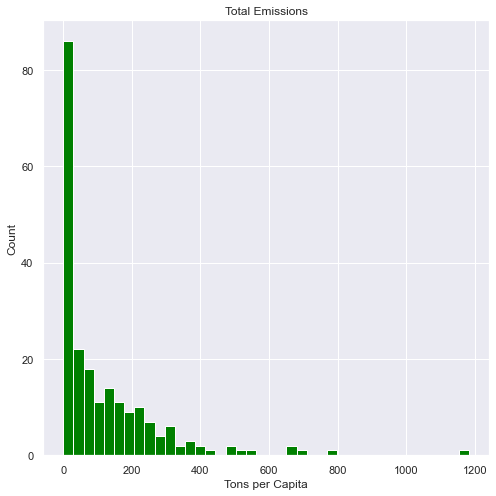

In [108]:
plt.hist(carbon_df['Total Emissions'], bins= 40, color ='green')
plt.xlabel("Tons per Capita")
plt.ylabel("Count")
plt.title("Total Emissions")
plt.show()

We can see that the majority of countries are in the lower carbon emissions, while there are outliers which are responsible for most emissions in the world. 

Lets focus next on latin america and the caribbean to see how much our region is responsible for world emissions:

# CO2 Emissions in Latin America & Caribbean

In [7]:
latam =carbon_df[carbon_df['Region']== 'Latin America & Caribbean'].sort_values('Total Emissions',ascending=False)[:25]
latam

,Country Name,country_code,Region,Indicator Name,1990,1991,1992,1993,1994,1995,...,2012,2013,2014,2015,2016,2017,2018,2019,2019.1,Total Emissions
194,Trinidad and Tobago,TTO,Latin America & Caribbean,CO2 emissions (metric tons per capita),10.768794,10.617456,10.633266,8.620100,7.034662,6.872907,...,16.002213,16.406787,16.178083,15.565571,13.291588,13.185845,12.792831,12.322855,12.322855,372.039375
20,"Bahamas, The",BHS,Latin America & Caribbean,CO2 emissions (metric tons per capita),7.649467,7.815882,9.660637,7.710328,7.504106,7.852123,...,9.763986,7.653297,6.799325,5.905933,5.397925,5.684363,7.260752,7.291661,7.291661,234.504362
205,"Venezuela, RB",VEN,Latin America & Caribbean,CO2 emissions (metric tons per capita),5.176577,5.025300,5.015640,5.109697,4.960755,5.199925,...,6.169104,6.058551,5.966121,5.422876,5.060760,4.789392,4.574011,3.939566,3.939566,164.029642
9,Antigua and Barbuda,ATG,Latin America & Caribbean,CO2 emissions (metric tons per capita),3.358227,3.472058,4.498984,3.800721,3.720183,3.931733,...,7.742763,5.136051,5.185713,5.236665,5.289886,5.239717,5.296940,5.354476,5.354476,162.534883
27,Barbados,BRB,Latin America & Caribbean,CO2 emissions (metric tons per capita),3.755753,3.741715,4.488569,3.789759,3.888362,4.023237,...,7.472735,5.065179,4.458878,4.451033,4.513677,4.122573,4.325984,4.355082,4.355082,159.233988
103,St. Kitts and Nevis,KNA,Latin America & Caribbean,CO2 emissions (metric tons per capita),2.732240,2.724053,3.686319,3.402931,3.604210,3.564893,...,6.816223,4.570021,4.529699,4.687134,4.648550,4.612191,4.767535,4.731801,4.731801,148.625293
178,Suriname,SUR,Latin America & Caribbean,CO2 emissions (metric tons per capita),4.343866,4.963572,4.873318,4.812769,4.757538,4.730101,...,4.508108,4.184215,4.735413,4.864648,5.222320,4.382113,3.836892,4.558254,4.558254,123.669111
124,Mexico,MEX,Latin America & Caribbean,CO2 emissions (metric tons per capita),3.211460,3.367924,3.349751,3.392592,3.621485,3.347469,...,4.147973,4.003630,3.840634,3.870317,3.837647,3.779372,3.586395,3.521600,3.521600,116.981913
6,Argentina,ARG,Latin America & Caribbean,CO2 emissions (metric tons per capita),3.075541,3.202031,3.218974,3.245795,3.252945,3.241342,...,4.264224,4.342115,4.209096,4.301914,4.201846,4.071308,3.975772,3.740650,3.740650,115.774743
34,Chile,CHL,Latin America & Caribbean,CO2 emissions (metric tons per capita),2.299125,2.171133,2.209942,2.317688,2.515822,2.709851,...,4.506229,4.723555,4.311061,4.576124,4.749830,4.714020,4.624338,4.821118,4.821118,113.148599


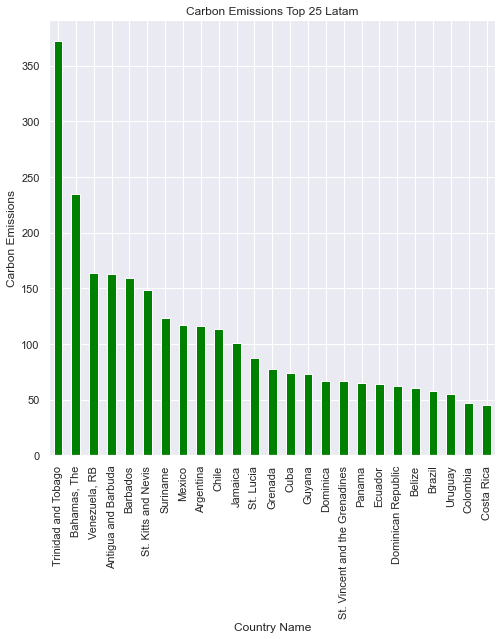

In [78]:
#calculate sum of values by group
df_groups = latam.groupby(['Country Name'])['Total Emissions'].sum().sort_values(ascending=False)

#create bar plot by group
df_groups.plot(kind='bar',color ='green')

plt.xlabel("Country Name")
plt.ylabel("Carbon Emissions")
plt.title("Carbon Emissions Top 25 Latam")
plt.show()

Latam & Caribbean are not the issue, who is?

In [8]:
country_map = carbon_df[['Country Name','Total Emissions']].sort_values('Total Emissions',ascending=False)[:10]
country_map

,Country Name,Total Emissions
162,Qatar,1183.479665
5,United Arab Emirates,771.017886
19,Bahrain,694.734161
105,Kuwait,668.307522
115,Luxembourg,662.097055
202,United States,559.215426
10,Australia,520.049076
28,Brunei Darussalam,497.990205
32,Canada,493.065113
166,Saudi Arabia,428.619004


In [119]:
country_map['Long']= [50.657289,51.711914,50.307386,46.9752658,5.5729138,-113.7087316,115.1915117,114.1594542,-106.34,23.9561807]

In [117]:
country_map['Lat']= [25.3430486, 24.3374985,25.9406805,29.3129026,49.8139485,36.2127171,-25.0281976,4.5500052,56.13,36.0488944]

# Map showing the top 10 countries responsible for CO2 Emissions

In [ ]:
#need help fixing the map

In [120]:
mapa= folium.Map(location=[31, -89], zoom_start=5)

for indice, fila in country_map.iterrows():
    folium.Marker(
        location=[fila.loc['Lat'],fila.loc['Long']],
        popup=f"{fila.loc['Country Name']}",
        tooltip= 'click'
    ).add_to(mapa)

mapa

# Petrol Analysis

What do they all have in common? (Petrol Analysis)

In [80]:
petrol = pd.read_csv('Top Global Oil Producers 1965-2020.csv')
petrol.head(30)

,Country,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Canada,920.000000,1012.000000,1106.000000,1194.000000,1306.000000,1473.000000,1582.000000,1829.000000,2114.000000,...,3202.397689,3332.079800,3514.822066,3740.237677,4000.410965,4270.529903,4388.135578,4450.796497,4798.189605,5208.366395
1,Mexico,362.000000,370.000000,411.000000,439.000000,461.000000,487.000000,486.000000,506.000000,525.000000,...,2978.494802,2959.366480,2940.313380,2911.097981,2874.752731,2784.200879,2586.540847,2455.799498,2224.150160,2068.371143
2,US,9014.148000,9579.241000,10219.252000,10599.743000,10827.674000,11296.849000,11155.778000,11184.896000,10945.953000,...,7259.106959,7551.781110,7870.379589,8909.662541,10072.733000,11773.175340,12772.915010,12339.915170,13134.738660,15310.691230
3,Argentina,275.673973,292.864110,318.631233,348.158470,361.532055,399.464657,431.538082,444.115847,433.635616,...,729.694854,711.840091,667.236399,656.733072,644.847580,638.019797,646.847020,610.104078,590.548947,591.808071
4,Brazil,96.000000,117.000000,147.000000,161.000000,176.000000,166.681031,174.845001,171.186291,173.986204,...,2019.426378,2125.051810,2173.046463,2131.583647,2095.975105,2341.375161,2524.976918,2591.348570,2720.902161,2682.516849
5,Colombia,203.000000,199.000000,192.000000,176.000000,214.000000,226.000000,224.000000,203.000000,192.000000,...,670.603236,785.864600,915.264715,944.119227,1009.871696,990.379051,1005.574436,885.898434,854.039950,866.100731
6,Ecuador,8.000000,7.000000,6.000000,5.000000,4.000000,4.000000,4.000000,78.000000,209.000000,...,488.065753,488.087010,500.608001,504.615536,527.353561,556.553903,543.094861,548.391833,531.312573,517.230716
7,Peru,66.000000,66.000000,74.000000,77.000000,75.000000,74.972603,63.882192,66.601093,72.591781,...,155.447841,165.211400,158.506586,157.232995,171.322816,175.225466,152.952310,140.702243,136.636178,153.625912
8,Trinidad & Tobago,135.000000,153.000000,179.000000,191.000000,157.000000,140.000000,129.000000,141.000000,166.000000,...,150.314844,145.367597,135.871288,116.952331,115.602732,114.115419,108.746447,96.660918,98.690234,87.316538
9,Venezuela,3503.000000,3402.000000,3576.000000,3639.000000,3631.000000,3754.000000,3615.000000,3301.000000,3455.000000,...,3037.835918,2841.572027,2755.021082,2703.734191,2680.356164,2692.493151,2630.863000,2347.000000,2096.042800,1513.861258


In [81]:
petrol.fillna(0, inplace=True)

In [82]:
petrol['Total Oil'] = petrol.sum(axis=1)
petrol.head()

/var/folders/ds/5nt6qnxj0tj3npycypwl5nch0000gn/T/ipykernel_1234/1449501610.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  petrol['Total Oil'] = petrol.sum(axis=1)


,Country,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total Oil
0,Canada,920.000000,1012.00000,1106.000000,1194.00000,1306.000000,1473.000000,1582.000000,1829.000000,2114.000000,...,3332.079800,3514.822066,3740.237677,4000.410965,4270.529903,4388.135578,4450.796497,4798.189605,5208.366395,132051.486722
1,Mexico,362.000000,370.00000,411.000000,439.00000,461.000000,487.000000,486.000000,506.000000,525.000000,...,2959.366480,2940.313380,2911.097981,2874.752731,2784.200879,2586.540847,2455.799498,2224.150160,2068.371143,129393.973498
2,US,9014.148000,9579.24100,10219.252000,10599.74300,10827.674000,11296.849000,11155.778000,11184.896000,10945.953000,...,7551.781110,7870.379589,8909.662541,10072.733000,11773.175340,12772.915010,12339.915170,13134.738660,15310.691230,512746.622654
3,Argentina,275.673973,292.86411,318.631233,348.15847,361.532055,399.464657,431.538082,444.115847,433.635616,...,711.840091,667.236399,656.733072,644.847580,638.019797,646.847020,610.104078,590.548947,591.808071,32295.238274
4,Brazil,96.000000,117.00000,147.000000,161.00000,176.000000,166.681031,174.845001,171.186291,173.986204,...,2125.051810,2173.046463,2131.583647,2095.975105,2341.375161,2524.976918,2591.348570,2720.902161,2682.516849,52508.659118


In [83]:
top_petrol = petrol[['Country','Total Oil']].sort_values('Total Oil',ascending=False)[:10]
top_petrol

,Country,Total Oil
2,US,512746.622654
26,Saudi Arabia,440532.388703
17,Russian Federation,314928.084769
21,Iran,201194.397954
19,USSR,185525.262700
9,Venezuela,148683.922454
44,China,141957.070243
0,Canada,132051.486722
1,Mexico,129393.973498
23,Kuwait,120344.608524


In [84]:
top_emissions = carbon_df[['Country Name','Total Emissions']].sort_values('Total Emissions',ascending=False)[:10]
top_emissions

,Country Name,Total Emissions
162,Qatar,1183.479665
5,United Arab Emirates,771.017886
19,Bahrain,694.734161
105,Kuwait,668.307522
115,Luxembourg,662.097055
202,United States,559.215426
10,Australia,520.049076
28,Brunei Darussalam,497.990205
32,Canada,493.065113
166,Saudi Arabia,428.619004


**Top CO2 Emitters vs Top Petrol Producers**

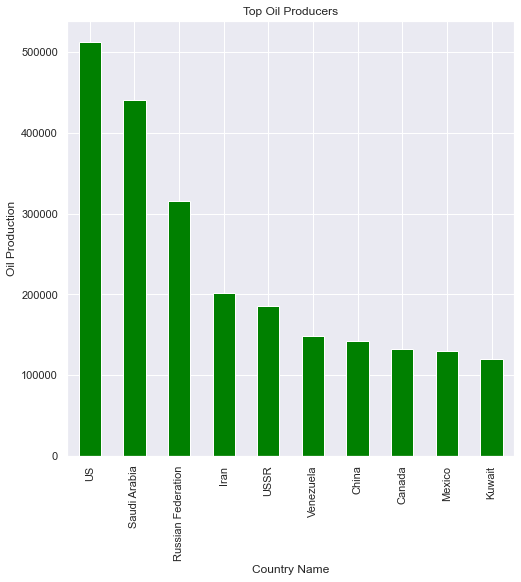

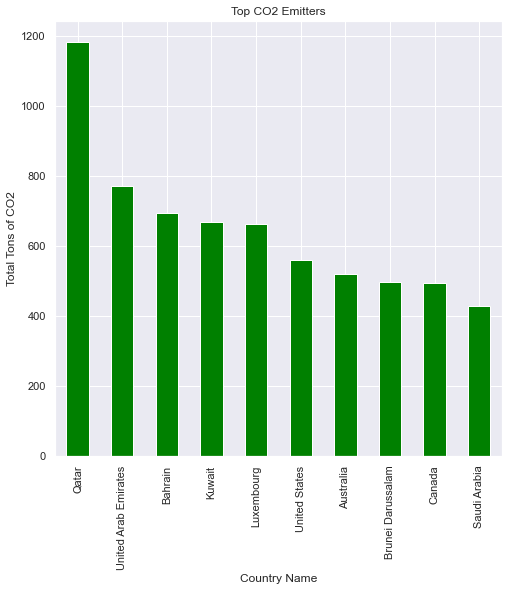

In [85]:
#calculate sum of values by group
group_oil = top_petrol.groupby(['Country'])['Total Oil'].sum().sort_values(ascending=False)


#create bar plot by group
group_oil.plot(kind='bar',color ='green')

plt.xlabel("Country Name")
plt.ylabel("Oil Production")
plt.title("Top Oil Producers")
plt.show()

#calculate sum of values by group
group_emissions = top_emissions.groupby(['Country Name'])['Total Emissions'].sum().sort_values(ascending=False)

#create bar plot by group
group_emissions.plot(kind='bar',color ='green')

plt.xlabel("Country Name")
plt.ylabel("Total Tons of CO2")
plt.title("Top CO2 Emitters")
plt.show()

Only Canada, Saudi Arabia and The United States are in both top lists, what other factors can affect the CO2 emissions?

# Factors that affect CO2 Emissions

In [87]:
energy = pd.read_csv('energy.csv')
energy

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,0,World,all_energy_types,1980,292.899790,296.337228,27770.910281,4.298127e+06,68.145921,10.547000,4946.627130
1,1,World,coal,1980,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547000,1409.790188
2,2,World,natural_gas,1980,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547000,1081.593377
3,3,World,petroleum_n_other_liquids,1980,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547000,2455.243565
4,4,World,nuclear,1980,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
55435,55435,Zimbabwe,coal,2019,0.045064,0.075963,37.620400,1.465420e+04,11.508701,4.482962,4.586869
55436,55436,Zimbabwe,natural_gas,2019,0.000000,0.000000,37.620400,1.465420e+04,11.508701,4.482962,0.000000
55437,55437,Zimbabwe,petroleum_n_other_liquids,2019,0.055498,0.000000,37.620400,1.465420e+04,11.508701,4.482962,4.377890
55438,55438,Zimbabwe,nuclear,2019,NaN,NaN,37.620400,1.465420e+04,11.508701,4.482962,0.000000


In [88]:
energy['CO2_emission'].replace(0, np.nan, inplace=True)

In [89]:
energy_co2 = energy[energy['CO2_emission'].notna()]

In [90]:
energy_co2 = energy_co2[energy_co2.Country != 'World']

In [91]:
energy_co2.head(25)

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
1320,1320,United States,all_energy_types,1980,78.021113,67.146595,7080.75,227119.000,343.525258,11.018764,4946.627130
1321,1321,United States,coal,1980,15.422809,18.597725,7080.75,227119.000,343.525258,11.018764,1409.790188
1322,1322,United States,natural_gas,1980,20.235459,19.907600,7080.75,227119.000,343.525258,11.018764,1081.593377
1323,1323,United States,petroleum_n_other_liquids,1980,34.158965,20.473758,7080.75,227119.000,343.525258,11.018764,2455.243565
1392,1392,Afghanistan,all_energy_types,1981,0.029949,0.092724,NaN,13171.700,2.273773,0.000000,1.325965
1393,1393,Afghanistan,coal,1981,0.002604,0.002474,NaN,13171.700,2.273773,0.000000,0.231314
1394,1394,Afghanistan,natural_gas,1981,0.003141,0.082713,NaN,13171.700,2.273773,0.000000,0.111101
1395,1395,Afghanistan,petroleum_n_other_liquids,1981,0.016668,0.000000,NaN,13171.700,2.273773,0.000000,0.983550
1398,1398,Albania,all_energy_types,1981,0.162044,0.158691,NaN,2737.020,59.204716,0.000000,9.618526
1399,1399,Albania,coal,1981,0.025770,0.014367,NaN,2737.020,59.204716,0.000000,2.379753


In [92]:
all_energy=energy_co2[energy_co2.Energy_type == 'all_energy_types']
all_energy.head()

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
1320,1320,United States,all_energy_types,1980,78.021113,67.146595,7080.75,227119.000,343.525258,11.018764,4946.627130
1392,1392,Afghanistan,all_energy_types,1981,0.029949,0.092724,NaN,13171.700,2.273773,0.000000,1.325965
1398,1398,Albania,all_energy_types,1981,0.162044,0.158691,NaN,2737.020,59.204716,0.000000,9.618526
1404,1404,Algeria,all_energy_types,1981,0.663391,3.037537,NaN,19824.300,33.463543,0.000000,45.663591
1410,1410,American Samoa,all_energy_types,1981,0.006926,0.000000,NaN,33.701,205.527351,0.000000,0.425071


**Average over 40 years**

In [93]:
all_energy = all_energy.groupby('Country').mean()

In [94]:
all_energy.drop(['Unnamed: 0', 'Year', 
                ], axis=1, inplace=True)

In [95]:
all_energy.dropna(inplace=True)

In [96]:
all_energy.head()

,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
Country,,,,,,,
Afghanistan,0.063873,0.046021,43.670269,22179.566667,3.014126,1.200876,3.575990
Albania,0.118456,0.105399,23.236375,3034.725385,39.322152,4.243025,5.256862
Algeria,1.510535,5.705343,340.343469,31024.197436,47.916593,3.948794,82.575473
American Samoa,0.007190,0.000000,0.584765,51.903846,142.242222,5.186135,0.511761
Angola,0.168219,2.164043,116.284141,17822.210256,8.563254,1.288246,9.152593


In [97]:
all_energy['PC'] = all_energy['CO2_emission']/ all_energy['Population']

In [99]:
all_energy.head()

,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission,PC
Country,,,,,,,,
Afghanistan,0.063873,0.046021,43.670269,22179.566667,3.014126,1.200876,3.575990,0.000161
Albania,0.118456,0.105399,23.236375,3034.725385,39.322152,4.243025,5.256862,0.001732
Algeria,1.510535,5.705343,340.343469,31024.197436,47.916593,3.948794,82.575473,0.002662
American Samoa,0.007190,0.000000,0.584765,51.903846,142.242222,5.186135,0.511761,0.009860
Angola,0.168219,2.164043,116.284141,17822.210256,8.563254,1.288246,9.152593,0.000514


In [100]:
all_energy.isnull().sum()

Energy_consumption             0
Energy_production              0
GDP                            0
Population                     0
Energy_intensity_per_capita    0
Energy_intensity_by_GDP        0
CO2_emission                   0
PC                             0
dtype: int64

<AxesSubplot:>

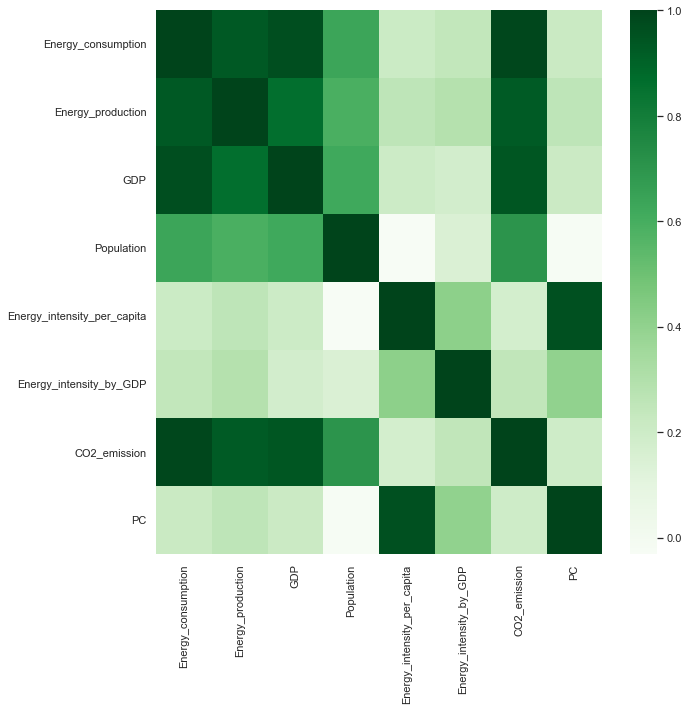

In [262]:
correlation = all_energy.corr()
sns.heatmap(all_energy.corr(), cmap="Greens")

# Energy Consumption 

We can see it is not only petrol production, but also all types of energy consumption, consumption of oil, coal, petrol natural gas, nuclear. Countries that consume a high level of any of these energies, also have high CO2 emissions

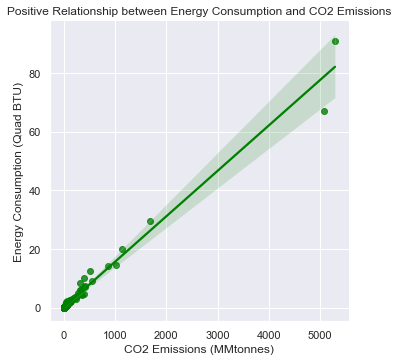

In [237]:
a= sns.lmplot(x ='CO2_emission', y='Energy_consumption' , data = all_energy, line_kws={'color': 'green'},
             scatter_kws={'color': 'green'})
a.set(title = "Positive Relationship between Energy Consumption and CO2 Emissions")
sns.set(rc = {'figure.figsize':(4,4)})

a.set(xlabel='CO2 Emissions (MMtonnes)', ylabel='Energy Consumption (Quad BTU)')

# People 

The energy intensity per capita is the measure of how inefficiently people use energy to provide products and services, PC is the level of CO2 emissions per person. The scatterplot shows that the more ineffectively used energy per person, the higher CO2 emissions per person. It is also our resposibility to be more conscious of our energy usage. People should turn to LED lights, electric cars, solar pannels, etc.

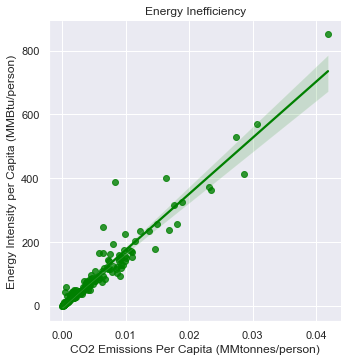

In [239]:
b= sns.lmplot(x ='PC', y='Energy_intensity_per_capita' , data = all_energy, line_kws={'color': 'green'}, scatter_kws={'color': 'green'})
b.set(title = "Energy Inefficiency")

sns.set(rc = {'figure.figsize':(4,4)})

b.set(xlabel='CO2 Emissions Per Capita (MMtonnes/person)', ylabel='Energy Intensity per Capita (MMBtu/person)')

# Is there someone particulary responsible?

In [227]:
#Total Emissions per Country
country_emissions = carbon_df[['Country Name','Total Emissions']].sort_values('Total Emissions',ascending=False)[:25]
country_emissions

,Country Name,Total Emissions
162,Qatar,1183.479665
5,United Arab Emirates,771.017886
19,Bahrain,694.734161
105,Kuwait,668.307522
115,Luxembourg,662.097055
202,United States,559.215426
10,Australia,520.049076
28,Brunei Darussalam,497.990205
32,Canada,493.065113
166,Saudi Arabia,428.619004


**Scatter Plot of Total Emissions per Country from 1990 - 2019**

The scatterplot shows 14 out of 25 countries still being around 400,000 tons of emissions, 
and a clear difference in Qatar having 3 times that amount. We can see that some places are
by far more responsible than others.

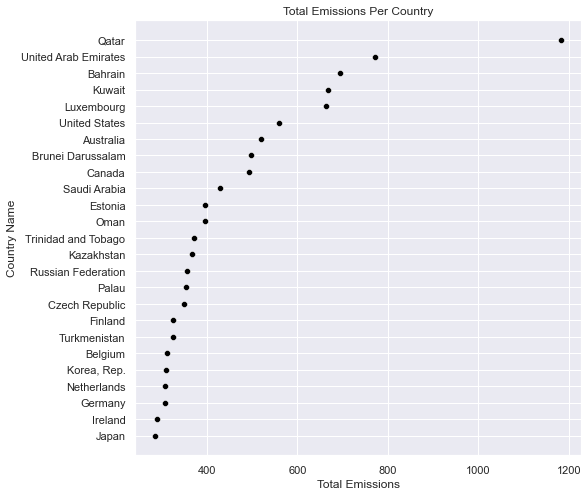

In [107]:
p= sns.scatterplot(x ='Total Emissions', y='Country Name' , data = country_emissions, color='black')
p.set(title = "Total Emissions Per Country")
sns.set(rc = {'figure.figsize':(8,8)})

# Box plot of the total emissions

Another visualization which shows that the problem is massively located in 1 or 2 specific countries

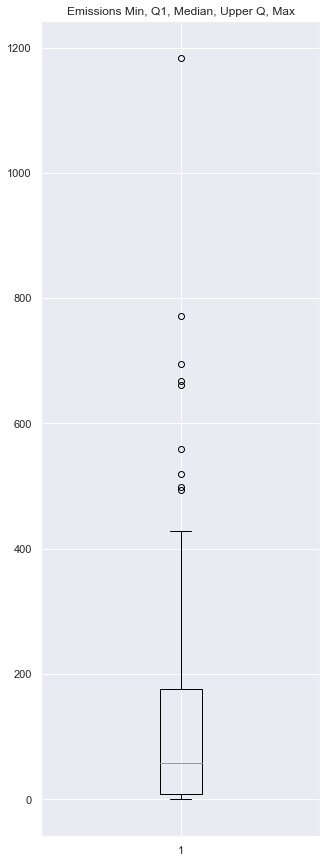

In [32]:
fig = plt.figure(figsize =(5, 15))
plt.boxplot(carbon_df['Total Emissions'])
plt.title("Emissions Min, Q1, Median, Upper Q, Max")
plt.show()

# Have there been any improvements in the past 30 years?


In [33]:
area1990 = carbon_df.groupby('Region').sum()[['1990']]
area1990

,1990
Region,
East Asia & Pacific,98.373009
Europe & Central Asia,426.580142
Latin America & Caribbean,73.863953
Middle East & North Africa,151.704781
North America,34.556236
South Asia,2.636176
Sub-Saharan Africa,27.118997


In [34]:
area2019 = carbon_df.groupby('Region').sum()[['2019']]
area2019

,2019
Region,
East Asia & Pacific,140.142667
Europe & Central Asia,286.244383
Latin America & Caribbean,100.148730
Middle East & North Africa,175.104550
North America,30.104023
South Asia,10.304685
Sub-Saharan Africa,43.942360


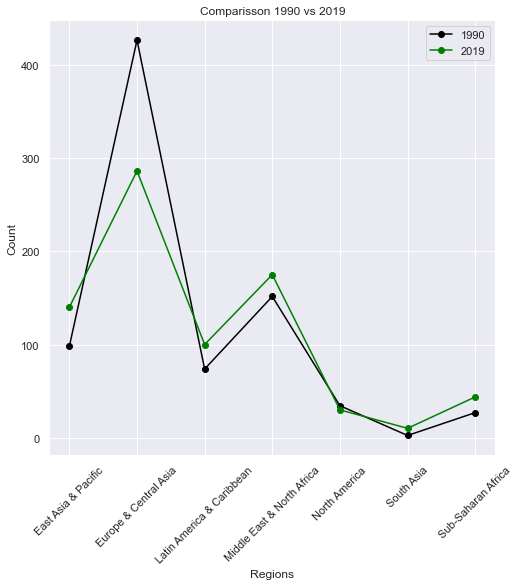

In [669]:
plt.plot(area1990.index, area1990['1990'], '-o', label='1990', color='black')
plt.plot(area2019.index, area2019['2019'],'-o', label='2019', color='green')

plt.xlabel("Regions")
plt.ylabel("Count")
plt.title("Comparisson 1990 vs 2019")
plt.legend()

plt.xticks(rotation=45)

plt.rcParams['figure.figsize'] = [10, 10]

plt.show()

Through the diagram we can see that most regions have actually gotten worse over the past 30 years. Only Europe & Central Asia and North America (slightly), have been able to make an improvement. Things have to change, but will they? In the next section we will analyze a country that needs to make a huge improvement, we will predict whether or not that will happen. 

# Time Series Prediction Model

Seasonal ARIMA captures historical values, shock events and seasonality. We can define a SARIMA model using the SARIMAX class

In [42]:
qatar = carbon_df[carbon_df['Country Name'] == 'Qatar']
qatar

,Country Name,country_code,Region,Indicator Name,1990,1991,1992,1993,1994,1995,...,2012,2013,2014,2015,2016,2017,2018,2019,2019.1,Total Emissions
162,Qatar,QAT,Middle East & North Africa,CO2 emissions (metric tons per capita),26.329327,30.737411,29.632441,33.122025,36.466263,37.102174,...,34.188222,32.59894,33.205895,33.04351,32.745888,32.12799,31.067533,32.474469,32.474469,1183.479665


In [43]:
qatar.drop(['country_code', 'Region', 'Indicator Name', 'Total Emissions'], axis= 1, inplace= True)

/var/folders/ds/5nt6qnxj0tj3npycypwl5nch0000gn/T/ipykernel_1234/1512224786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qatar.drop(['country_code', 'Region', 'Indicator Name', 'Total Emissions'], axis= 1, inplace= True)


In [44]:
qatar

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2019.1
162,Qatar,26.329327,30.737411,29.632441,33.122025,36.466263,37.102174,40.074177,47.429575,48.045021,...,33.494413,34.188222,32.59894,33.205895,33.04351,32.745888,32.12799,31.067533,32.474469,32.474469


In [45]:
qatar = qatar.transpose()

In [46]:
qatar

,162
Country Name,Qatar
1990,26.329327
1991,30.737411
1992,29.632441
1993,33.122025
1994,36.466263
1995,37.102174
1996,40.074177
1997,47.429575
1998,48.045021


In [48]:
qatar= qatar.iloc[1:31, :]
qatar

,162
1990,26.329327
1991,30.737411
1992,29.632441
1993,33.122025
1994,36.466263
1995,37.102174
1996,40.074177
1997,47.429575
1998,48.045021
1999,50.83385


In [49]:
qatar = qatar.reset_index()
qatar

,index,162
0,1990,26.329327
1,1991,30.737411
2,1992,29.632441
3,1993,33.122025
4,1994,36.466263
5,1995,37.102174
6,1996,40.074177
7,1997,47.429575
8,1998,48.045021
9,1999,50.83385


In [694]:
qatar.index.name= 'Index'
qatar.head()

Years,index,162
Index,,
0,1990,26.329327
1,1991,30.737411
2,1992,29.632441
3,1993,33.122025
4,1994,36.466263


In [331]:
qatar_array = np.asarray(qatar)

In [50]:
qatar.columns= ['Years','Values']

In [51]:
qatar

,Years,Values
0,1990,26.329327
1,1991,30.737411
2,1992,29.632441
3,1993,33.122025
4,1994,36.466263
5,1995,37.102174
6,1996,40.074177
7,1997,47.429575
8,1998,48.045021
9,1999,50.83385


**QATAR - top carbon emitter**

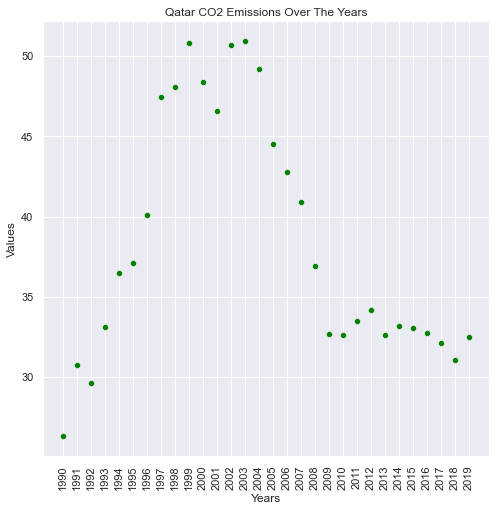

In [52]:
q= sns.scatterplot(x ='Years', y='Values' , data = qatar, color='green')
q.set(title = "Qatar CO2 Emissions Over The Years")

plt.xticks(rotation = 90)
sns.set(rc = {'figure.figsize':(8,8)})

In [53]:
qatar['Years']=qatar['Years'].astype('str').astype('int')

In [54]:
qatar['Values']= qatar['Values'].astype('float')

In [192]:

import statsmodels

# df = your DataFrame

endog =qatar['Values']
endog.index = pd.period_range("1990", "2019", freq="Y") 

# Construct the (very simple) AR model
mod = statsmodels.tsa.statespace.sarimax.SARIMAX(endog, order=(6, 0, 3))#, trend='c')



In [193]:
# Estimate the parameters
res = mod.fit()

/Users/danser/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/danser/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.58695D+02    |proj g|=  5.03447D+02

At iterate    5    f=  2.62841D+00    |proj g|=  2.82657D-01

At iterate   10    f=  2.42193D+00    |proj g|=  3.77359D-02

At iterate   15    f=  2.39573D+00    |proj g|=  4.94703D-01

At iterate   20    f=  2.37330D+00    |proj g|=  3.89389D-02

At iterate   25    f=  2.36841D+00    |proj g|=  4.93225D-02

At iterate   30    f=  2.36496D+00    |proj g|=  3.05104D-02

At iterate   35    f=  2.36257D+00    |proj g|=  1.12478D-01

At iterate   40    f=  2.36172D+00    |proj g|=  6.90473D-03

At iterate   45    f=  2.36067D+00    |proj g|=  5.55437D-02

At iterate   50    f=  2.35867D+00    |proj g|=  1.51769D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/danser/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [194]:
qatar_forecast=res.forecast(steps=7)

In [195]:
qatar_forecast

2020    32.345278
2021    31.253175
2022    30.029165
2023    30.624491
2024    30.959389
2025    29.779572
2026    28.431505
Freq: A-DEC, Name: predicted_mean, dtype: float64

In [196]:
qatar_forecast=pd.DataFrame(res.forecast(steps=7))

In [197]:
qatar_forecast =qatar_forecast.reset_index()

In [198]:
qatar_forecast.columns= ['Years','Values']

In [199]:
qatar_forecast

,Years,Values
0,2020,32.345278
1,2021,31.253175
2,2022,30.029165
3,2023,30.624491
4,2024,30.959389
5,2025,29.779572
6,2026,28.431505


In [200]:
qatar_forecast['Years']=qatar_forecast['Years'].astype('str').astype('int')

In [201]:
qatar_forecast['Values']=qatar_forecast['Values'].astype('float')

In [202]:
qatar_concat = pd.concat([qatar,qatar_forecast])
qatar_concat

,Years,Values
0,1990,26.329327
1,1991,30.737411
2,1992,29.632441
3,1993,33.122025
4,1994,36.466263
5,1995,37.102174
6,1996,40.074177
7,1997,47.429575
8,1998,48.045021
9,1999,50.833850


In [203]:
qatar_concat['Values']=qatar_concat['Values'].astype('float')

In [204]:
qatar_concat['Years']=qatar_concat['Years'].astype('str').astype('int')

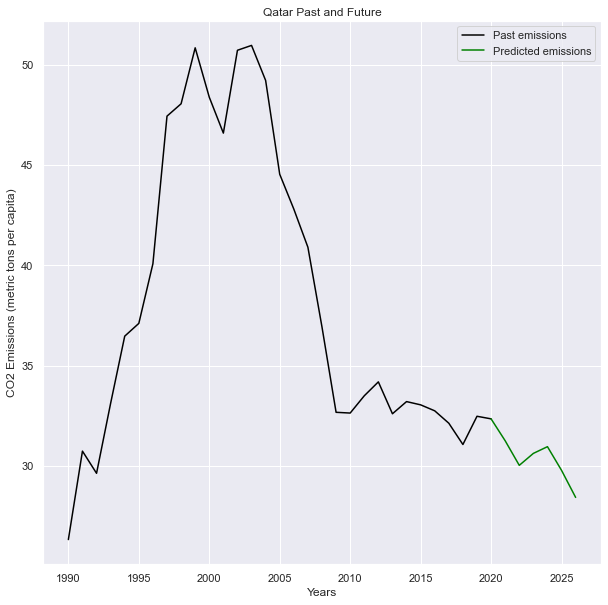

In [253]:
plt.plot(qatar_concat['Years'][:-6], qatar_concat['Values'][:-6], label= 'Past emissions',color='black')
plt.plot(qatar_concat['Years'][-7:], qatar_concat['Values'][-7:], label= 'Predicted emissions', color='green')

plt.xlabel('Years')
plt.ylabel('CO2 Emissions (metric tons per capita)')
plt.title('Qatar Past and Future')

plt.legend()

plt.rcParams['figure.figsize'] = [2, 2]



**UNITED STATES OF AMERICA - top petrol producer**

In [13]:
usa = carbon_df[carbon_df['Country Name'] == 'United States']
usa

,Country Name,country_code,Region,Indicator Name,1990,1991,1992,1993,1994,1995,...,2012,2013,2014,2015,2016,2017,2018,2019,2019.1,Total Emissions
202,United States,USA,North America,CO2 emissions (metric tons per capita),19.407346,19.003403,19.02286,19.218333,19.256212,19.216909,...,15.789783,16.111184,16.040921,15.560035,15.149885,14.823261,15.222548,14.673411,14.673411,559.215426


In [14]:
usa.drop(['country_code', 'Region', 'Indicator Name', 'Total Emissions'], axis= 1, inplace= True)

/var/folders/ds/5nt6qnxj0tj3npycypwl5nch0000gn/T/ipykernel_1234/3026310842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa.drop(['country_code', 'Region', 'Indicator Name', 'Total Emissions'], axis= 1, inplace= True)


In [15]:
usa = usa.transpose()
usa

,202
Country Name,United States
1990,19.407346
1991,19.003403
1992,19.02286
1993,19.218333
1994,19.256212
1995,19.216909
1996,19.57538
1997,20.330855
1998,20.2663


In [16]:
usa= usa.iloc[1:31, :]

In [17]:
usa_df = usa.reset_index()

In [18]:
usa_df.columns= ['Years','Values']

In [19]:
usa_df

,Years,Values
0,1990,19.407346
1,1991,19.003403
2,1992,19.02286
3,1993,19.218333
4,1994,19.256212
5,1995,19.216909
6,1996,19.57538
7,1997,20.330855
8,1998,20.2663
9,1999,20.101132


In [20]:
usa_df['Years']=usa_df['Years'].astype('str').astype('int')

In [21]:
usa_df['Years'].dtype

dtype('int64')

In [22]:
usa_df['Values']= usa_df['Values'].astype('float')

In [23]:
usa_df['Values'].dtype

dtype('float64')

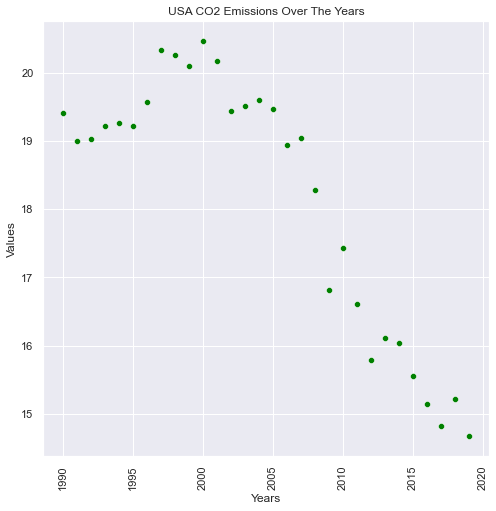

In [25]:
z= sns.scatterplot(x ='Years', y='Values' , data = usa_df, color='green')
z.set(title = "USA CO2 Emissions Over The Years")

plt.xticks(rotation=90)
sns.set(rc = {'figure.figsize':(8,8)})

In [28]:
# df = your DataFrame

endog1 =usa_df['Values']
endog1.index = pd.period_range("1990", "2019", freq="Y") 

# Construct the (very simple) AR model
mod1 = statsmodels.tsa.statespace.sarimax.SARIMAX(endog1, order=(4, 1, 1), trend='c')

In [663]:
#the margin of error grows as the prediction becomes more far

In [29]:
# Estimate the parameters
res1 = mod1.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.45016D-01    |proj g|=  2.48483D-01

At iterate    5    f=  5.36515D-01    |proj g|=  3.44242D-02

At iterate   10    f=  5.36308D-01    |proj g|=  8.05084D-04

At iterate   15    f=  5.36307D-01    |proj g|=  4.01976D-04

At iterate   20    f=  5.36307D-01    |proj g|=  5.76785D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     21     24      1     0     0   3.952D-06   5.363D-01
  F =  0.53630727872901041     

CONVERG

 This problem is unconstrained.


In [30]:
res1.forecast(steps=7)

2020    14.354662
2021    14.493943
2022    14.222988
2023    13.921743
2024    13.905644
2025    13.739974
2026    13.489589
Freq: A-DEC, Name: predicted_mean, dtype: float64

In [31]:
usa_forecast=pd.DataFrame(res1.forecast(steps=7))

In [32]:
usa_forecast = usa_forecast.reset_index()

In [33]:
usa_forecast.columns= ['Years','Values']

In [34]:
usa_forecast

,Years,Values
0,2020,14.354662
1,2021,14.493943
2,2022,14.222988
3,2023,13.921743
4,2024,13.905644
5,2025,13.739974
6,2026,13.489589


In [35]:
usa_forecast['Years']=usa_forecast['Years'].astype('str').astype('int')

In [36]:
usa_forecast['Values']=usa_forecast['Values'].astype('float')

In [37]:
usa_concat = pd.concat([usa_df,usa_forecast])
usa_concat

,Years,Values
0,1990,19.407346
1,1991,19.003403
2,1992,19.022860
3,1993,19.218333
4,1994,19.256212
5,1995,19.216909
6,1996,19.575380
7,1997,20.330855
8,1998,20.266300
9,1999,20.101132


In [38]:
usa_concat['Values']=usa_concat['Values'].astype('float')

In [39]:

usa_concat['Years']=usa_concat['Years'].astype('str').astype('int')

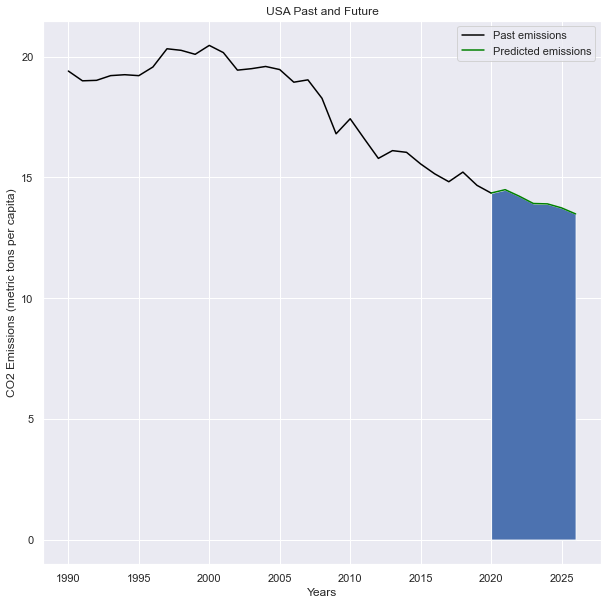

In [275]:

plt.plot(usa_concat['Years'][:-6], usa_concat['Values'][:-6], label= 'Past emissions', color='black')

plt.plot(usa_concat['Years'][-7:], usa_concat['Values'][-7:], label= 'Predicted emissions', color='green')
plt.fill_between(usa_concat['Years'][-7:], usa_concat['Values'][-7:])
#plt.errorbar(usa_concat['Years'][-7:], usa_concat['Values'][-7:], linestyle='None', marker='^')


plt.xlabel('Years')
plt.ylabel('CO2 Emissions (metric tons per capita)')
plt.title('USA Past and Future')

plt.legend()

plt.rcParams['figure.figsize'] = [10, 10]

# Linear Regression Model Qatar

In [373]:
#predict/ predictor is X
#target, dependent variable, response is y

predictor = qatar_df[['Years']]
response =  qatar_df['Values']

X_train, X_test, y_train, y_test = train_test_split(predictor, response, test_size=0.20)

In [374]:
qatar_model = LinearRegression()

In [369]:
X_train

7     1997
22    2012
0     1990
28    2018
3     1993
20    2010
13    2003
14    2004
25    2015
8     1998
16    2006
9     1999
24    2014
23    2013
17    2007
10    2000
1     1991
19    2009
18    2008
5     1995
2     1992
11    2001
26    2016
27    2017
Name: Years, dtype: period[A-DEC]

In [375]:
qatar_model.fit(X_train, y_train)

LinearRegression()

In [380]:
X_test

,Years
10,2000
20,2010
17,2007
25,2015
0,1990
1,1991


In [456]:
y_pred= qatar_model.predict(X_test)

In [379]:
y_pred

array([40.98765448, 37.32260628, 38.42212074, 35.49008218, 44.65270269,
       44.28619787])

In [382]:
preds= pd.DataFrame([y_pred, y_test])

In [378]:
preds

,0,1,2,3,4,5
0,40.987654,37.322606,38.422121,35.490082,44.652703,44.286198
1,48.374002,32.634302,40.896524,33.043510,26.329327,30.737411
